# show up dataset of joints

14 joints or 19 joints

In [5]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [6]:
im_dir = "./up/p14_joints/"
index = "00001"
image_name = index + "_image.png"
ann_im_name = index + "_ann_vis.png"
txt_name = index + "_dataset_info.txt"
npy_name = index + "_joints.npy"

In [7]:
im = cv2.imread(os.path.join(im_dir,image_name))
ann_im = cv2.imread(os.path.join(im_dir,ann_im_name))
txt_f = open(os.path.join(im_dir,txt_name),'r')
npy_f = np.load(os.path.join(im_dir,npy_name))

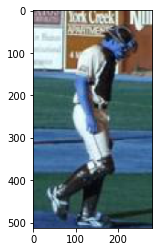

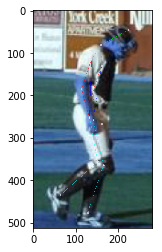


[[ 64.41931268 151.09122639 132.06011166 141.36885512 165.2197258
  128.34345721 131.00451627 113.77585263 136.21314307 161.03728321
  138.65173006 161.02765184 159.10137226 223.11921813]
 [435.5964925  356.94795431 253.60046991 258.49860592 365.34539483
  477.54059918 251.26535392 185.15620898 117.88609548 131.34840847
  200.95001339 268.81289452  82.41395921  46.06751102]]


In [9]:
plt.figure(1)
plt.imshow(im)
plt.figure(2)
plt.imshow(ann_im)
plt.show()
print(txt_f.read())
print(npy_f)

# show up dataset of s31

深度数据或者body seg

In [35]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [37]:
im_dir = "./s31/"
index = "00001"
image_name = index + "_image.png"
ann_vis_im_name = index + "_ann_vis.png"
ann_im_name = index + "_ann.png"

In [38]:
im = cv2.imread(os.path.join(im_dir,image_name))
ann_vis_im = cv2.imread(os.path.join(im_dir,ann_vis_im_name))
ann_im = cv2.imread(os.path.join(im_dir,ann_im_name))

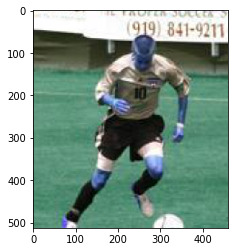

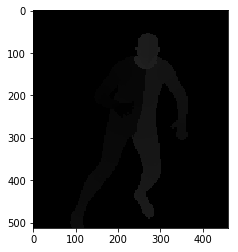

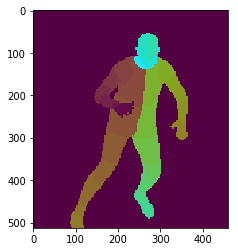

In [39]:
plt.figure(1)
plt.imshow(im)
plt.figure(2)
plt.imshow(ann_im)
plt.figure(3)
plt.imshow(ann_vis_im)

# show up dataset  of 3d

针对3D的数据,说明如下:
1. _dataset_info.txt:
> 数据来源
---
2. _fit_crop_info:
> 不确定
---
3. _quality_info:
> 图片质量说明
---
4. _image.png:
> 图片
---
5. _joints.npy:
> 关节点(3*14)
---
6. _render_light.png
> 标注图片展示
---
7. _body.pkl
> 3d相关标注

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle

In [2]:
im_dir = "./up/up-3d/"
index = "03531"
body_name = os.path.join(im_dir,index + "_body.pkl")
dataset_info_txt_name = os.path.join(im_dir,index + "_dataset_info.txt")
fit_crop_txt_name = os.path.join(im_dir,index + "_fit_crop_info.txt")
quality_info_name = os.path.join(im_dir,index + "_quality_info.txt")
im_name = os.path.join(im_dir,index + "_image.png")
npy_name = os.path.join(im_dir,index + "_joints.npy")
render_light_name = os.path.join(im_dir,index + "_render_light.png")

In [3]:
body_f = pickle.load(open(body_name,'rb'))
print("body_f : ")
print(body_f.keys())

body_f : 
['rt', 'j2d', 'f', 'pose', 'betas', 't', 'trans']


In [4]:
dataset_info_f = open(dataset_info_txt_name,'r')
print("dataset_info_f : ")
print(dataset_info_f.read())

dataset_info_f : 
mpii 3425


In [5]:
fit_crop_f = open(fit_crop_txt_name,'r')
print("fit_crop_f : ")
print(fit_crop_f.read())

fit_crop_f : 
318 164 108 719 178 494


In [6]:
quality_info_f = open(quality_info_name,'r')
print("quality_info_f : ")
print(quality_info_f.read())

quality_info_f : 
high



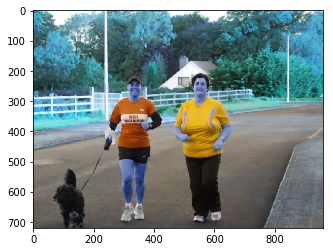

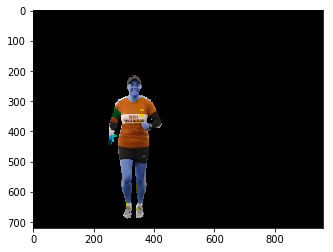

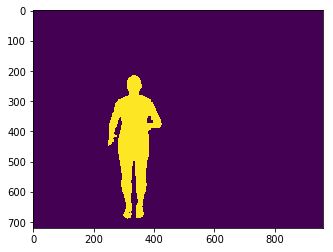

In [45]:
im = cv2.imread(im_name)
plt.figure(1)
plt.imshow(im)
render_light = cv2.imread(render_light_name)
render_light[render_light == 255] = 0
render_light[render_light != 0] = 1
split = render_light * im
plt.figure(2)
plt.imshow(split)
plt.show()
mask = np.zeros((im.shape[:2]))
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if render_light[i][j][0] != 0 or render_light[i][j][1] != 0 or render_light[i][j][2] != 0:
            mask[i][j] = 255
plt.figure(3)
plt.imshow(mask)
plt.show()

In [18]:
npy = np.load(npy_name)
print("npy:")
print(npy.shape)
print(npy)

npy:
(3, 14)
[[ 28.12031897  49.17944312  62.60463477  80.24165125  91.56093048
   78.39897788  61.28843951  49.96916028  63.92083003  98.66838488
  111.30385937 109.46118601  81.0313684   83.40051987]
 [166.65510177 136.64584985  95.84379681  96.10703586 130.85459071
  142.70034805  78.99649749  73.73171645  50.56667988  53.46230945
   69.78313067  96.37027491  52.6725923   30.82375099]
 [  1.           1.           1.           1.           1.
    1.           1.           1.           1.           1.
    1.           1.           1.           1.        ]]


# UP-3D SMPL statistics

In [20]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle

In [21]:
def statistics(x, name = "no name"):
    print(name,"mean",np.mean(x),"std",np.std(x),"max",np.max(x),"min",np.min(x))
    print(name,"ptp",np.ptp(x),"median",np.median(x),"average",np.average(x),"var",np.var(x))
    print()

In [22]:
im_dir = "./up/up-3d/"
# index = "00001"
# body_name = os.path.join(im_dir,index + "_body.pkl")
# body_f = pickle.load(open(body_name,'rb'))

In [23]:
rt = []
j2d = []
f = []
pose = []
betas = []
t = []
trans = []
for i in range(8515):
    sss = "00000"
    sss = sss[:5-len(str(i))] + str(i) 
    body_name = os.path.join(im_dir,sss + "_body.pkl")
    body_f = pickle.load(open(body_name,'rb'))
    rt.extend(body_f['rt'])
    j2d.extend(body_f['j2d'])
    f.append(body_f['f'])
    pose.extend(body_f['pose'])
    betas.extend(body_f['betas'])
    t.extend(body_f['t'])
    trans.extend(body_f['trans'])
summary = [rt,j2d,f,pose,betas,t,trans]
titles = ['rt','j2d','f','pose','betas','t','trans']

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc7 in position 3: ordinal not in range(128)

In [6]:
for i in range(len(titles)):
    statistics(summary[i],titles[i])

('rt', 'mean', 0.0, 'std', 0.0, 'max', 0.0, 'min', 0.0)
('rt', 'ptp', 0.0, 'median', 0.0, 'average', 0.0, 'var', 0.0)
()
('j2d', 'mean', 99.34795510196788, 'std', 58.83246658397979, 'max', 715.2086599103525, 'min', -19.7005274579804)
('j2d', 'ptp', 734.9091873683328, 'median', 84.84565932506864, 'average', 99.34795510196788, 'var', 3461.2591243550983)
()
('f', 'mean', 5000.0, 'std', 0.0, 'max', 5000.0, 'min', 5000.0)
('f', 'ptp', 0.0, 'median', 5000.0, 'average', 5000.0, 'var', 0.0)
()
('pose', 'mean', -0.30878798296952115, 'std', 8.188959979677602, 'max', 4337.346042951523, 'min', -1234.4789271634033)
('pose', 'ptp', 5571.824970114926, 'median', -0.003661180449038679, 'average', -0.30878798296952115, 'var', 67.0590655487614)
()
('betas', 'mean', 0.11011333346834663, 'std', 0.8200669395408837, 'max', 9.31128134404026, 'min', -5.1062321220543705)
('betas', 'ptp', 14.417513466094631, 'median', 0.008950571504189044, 'average', 0.11011333346834663, 'var', 0.6725097853279514)
()
('t', 'mean

In [7]:
btmp = [[] for i in range(10)]
num = []
for i in range(8515):
    sss = "00000"
    sss = sss[:5-len(str(i))] + str(i)
    body_name = os.path.join(im_dir,sss + "_body.pkl")
    body_f = pickle.load(open(body_name,'rb'))
    for j in range(10):
        btmp[j].append(body_f['betas'][j])
    num.extend([i])

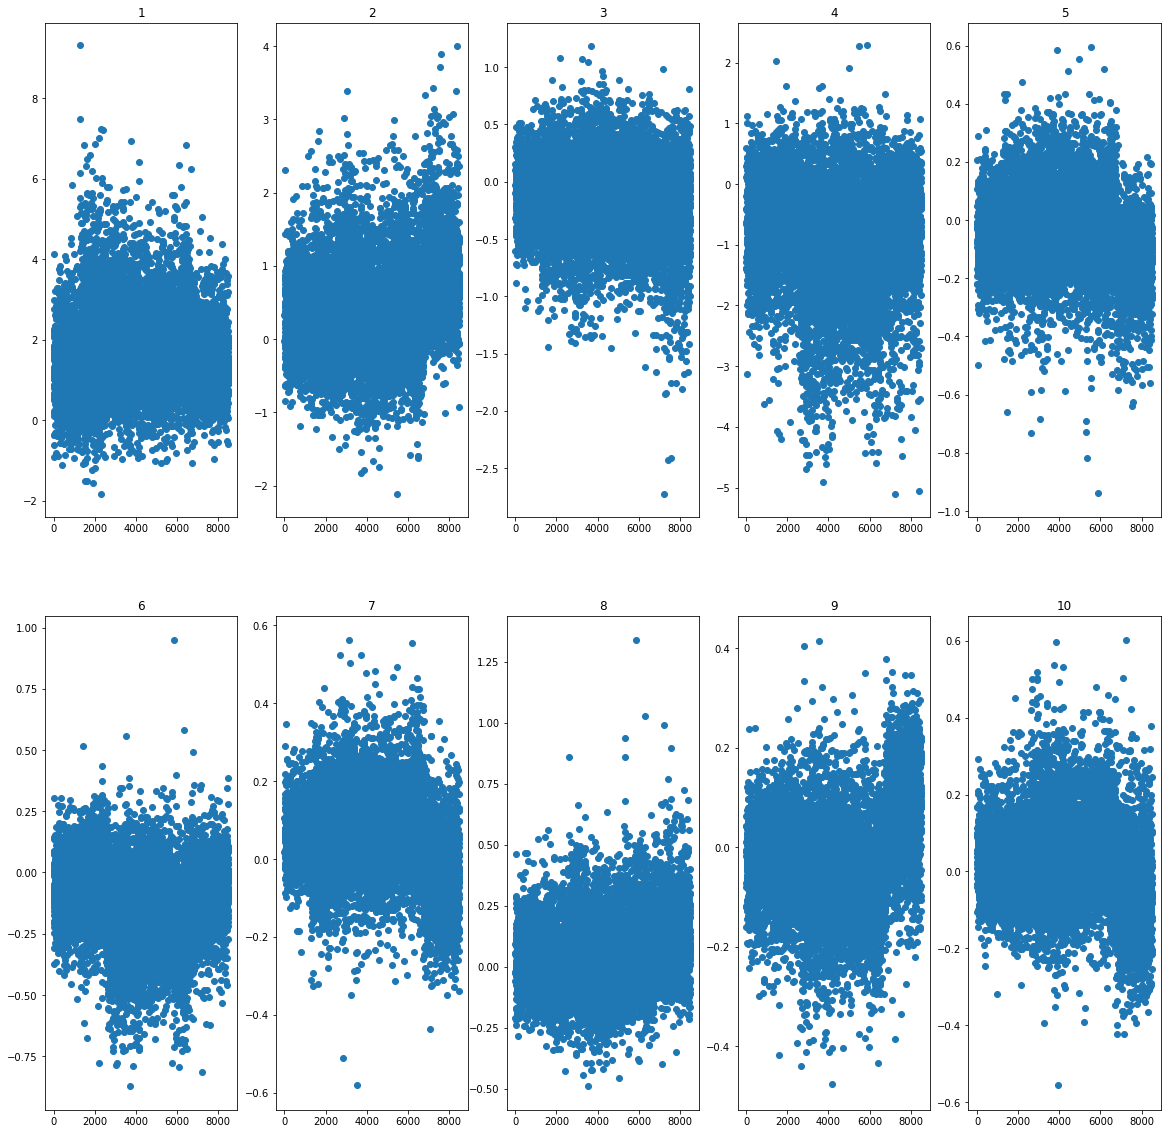

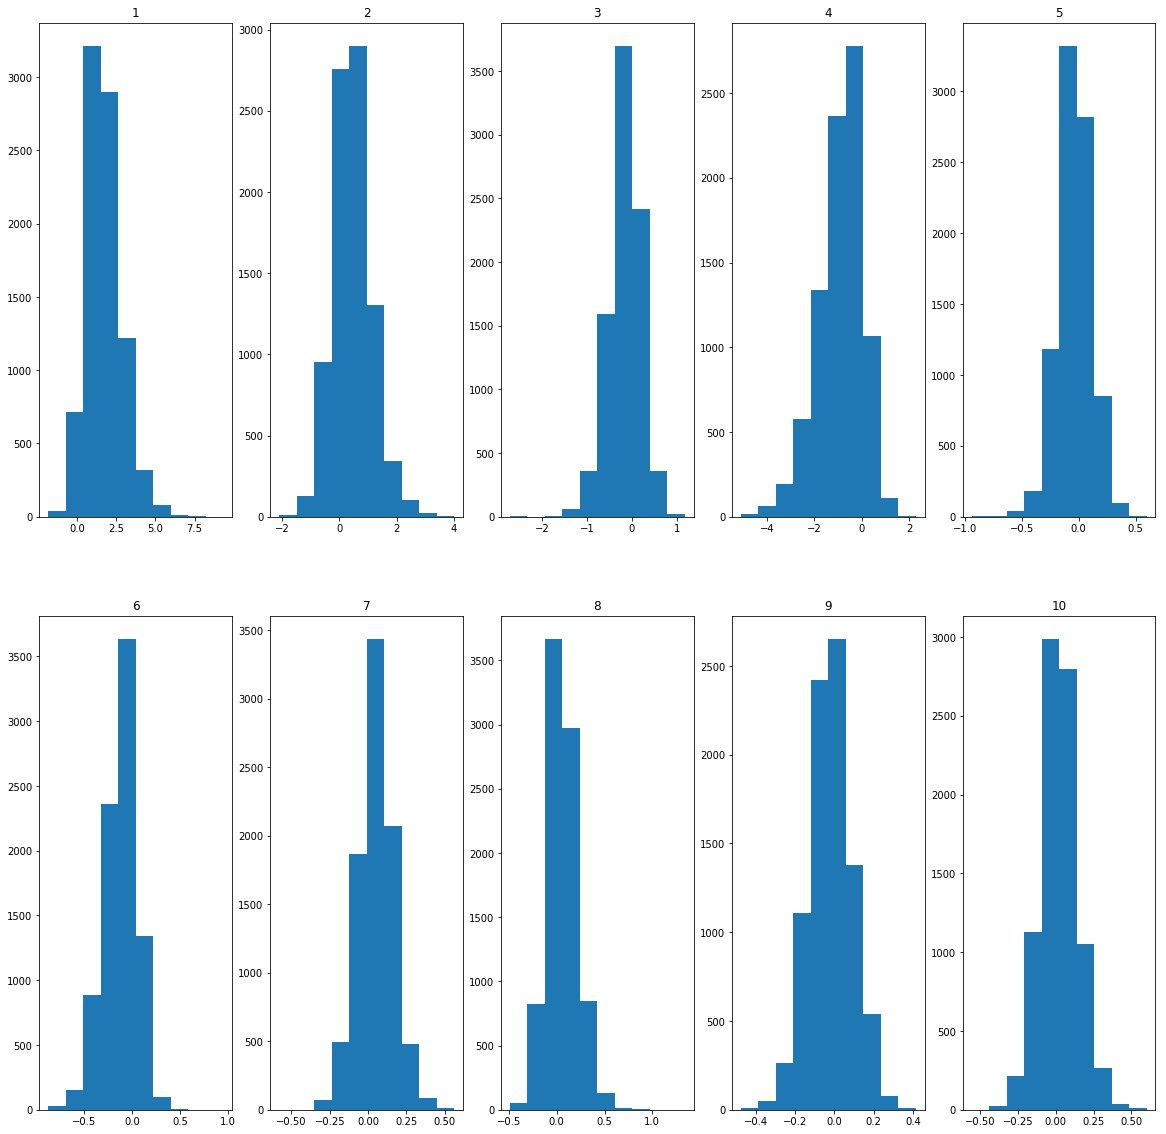

In [10]:
plt.figure(1,figsize=(20,20))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(i+1)
    plt.scatter(num,btmp[i])
plt.show()
plt.figure(2,figsize=(20,20))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(i+1)
    plt.hist(btmp[i])
plt.show()

In [9]:
for i in range(10):
    statistics(btmp[i],str(i))

('0', 'mean', 1.7251568298309732, 'std', 1.1194835255166233, 'max', 9.31128134404026, 'min', -1.8323789284754413)
('0', 'ptp', 11.143660272515701, 'median', 1.5957317783124296, 'average', 1.7251568298309732, 'var', 1.2532433639031282)
()
('1', 'mean', 0.4495845555640805, 'std', 0.6752809178933743, 'max', 4.005349800300282, 'min', -2.110487164985731)
('1', 'ptp', 6.115836965286013, 'median', 0.4093169217610103, 'average', 0.4495845555640805, 'var', 0.45600431807091807)
()
('2', 'mean', -0.15367366805876925, 'std', 0.3568620072482242, 'max', 1.186401443179316, 'min', -2.7220172706230557)
('2', 'ptp', 3.9084187138023716, 'median', -0.13196956551698028, 'average', -0.15367366805876925, 'var', 0.12735049221723163)
()
('3', 'mean', -0.8793515584663677, 'std', 0.9461147128488747, 'max', 2.2818976432903093, 'min', -5.1062321220543705)
('3', 'ptp', 7.388129765344679, 'median', -0.7509148846464306, 'average', -0.8793515584663677, 'var', 0.8951330498691086)
()
('4', 'mean', -0.037736858797075355,

# image statistics

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
im_dir = '/media/hdc/xuyan/dataset/up/up-3d/'
im_names = os.listdir(im_dir)

In [13]:
h_vec = []
w_vec = []
for i,name in enumerate(im_names):
    if "_image.png" in name:
        im_path = os.path.join(im_dir,name)
        im = cv2.imread(im_path)
        h_vec.append(im.shape[0])
        w_vec.append(im.shape[1])
    print(i,'/',len(im_names),end='\r')

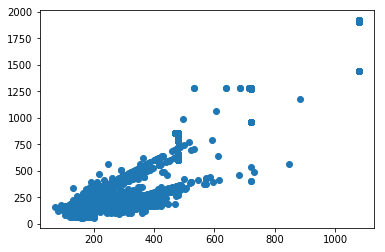

In [15]:
plt.scatter(h_vec,w_vec)
plt.show()

# Up-3d Split

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
import json

In [2]:
im_dir = "./up/up-3d/"
out_im_dir = './bodytype/up-3d/'

In [3]:
from __future__ import print_function

In [15]:
out_json = {}
num = 8515
for i in range(num):
    sss = "00000"
    index = sss[:5-len(str(i))] + str(i)
    body_name = os.path.join(im_dir,index + "_body.pkl")
    im_name = os.path.join(im_dir,index + "_image.png")
    npy_name = os.path.join(im_dir,index + "_joints.npy")
    render_light_name = os.path.join(im_dir,index + "_render_light.png")
    out_im_name = index + "_split.png"
    out_im_path = os.path.join(out_im_dir,index + "_split.png")
    
    im = cv2.imread(im_name)
    render_light = cv2.imread(render_light_name)
    render_light[render_light == 255] = 0
    render_light[render_light != 0] = 1
    split_im = render_light * im
    cv2.imwrite(out_im_path,split_im)
    
    body_f = pickle.load(open(body_name,'rb'))
    out_json[out_im_name] = {}
    for key in body_f.keys():
        if key == 'f':
            out_json[out_im_name][key] = body_f[key]
        else:
            out_json[out_im_name][key] = body_f[key].tolist()
    npy = np.load(npy_name)
    out_json[out_im_name]["j3d"] = npy.tolist()
    print(i+1,'/',num,end='\r')
f = open('./bodytype/up-3d.json','w')
f.write(json.dumps(out_json,indent=2))